In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
parent_dir = os.path.dirname(os.path.realpath('../analysis'))
sys.path.append(parent_dir)
import analysis.disp_h2o_data

In [2]:
test_data = np.load('../../2_scene_wv_mask.npz')
wv = test_data['output_wv'].reshape((2, 1280, 1242))
refls = test_data['output_rfl'].reshape((2, 1280, 1242, 285))

pred_data = np.load('../../predicted_wv_masks/all_rf_6_40_wv_mask_emit20220815t151826_o22710_s000.npy')
pred_data = pred_data.reshape((1280, 1242))
print(wv.shape)
print(pred_data.shape)

(2, 1280, 1242)
(1280, 1242)


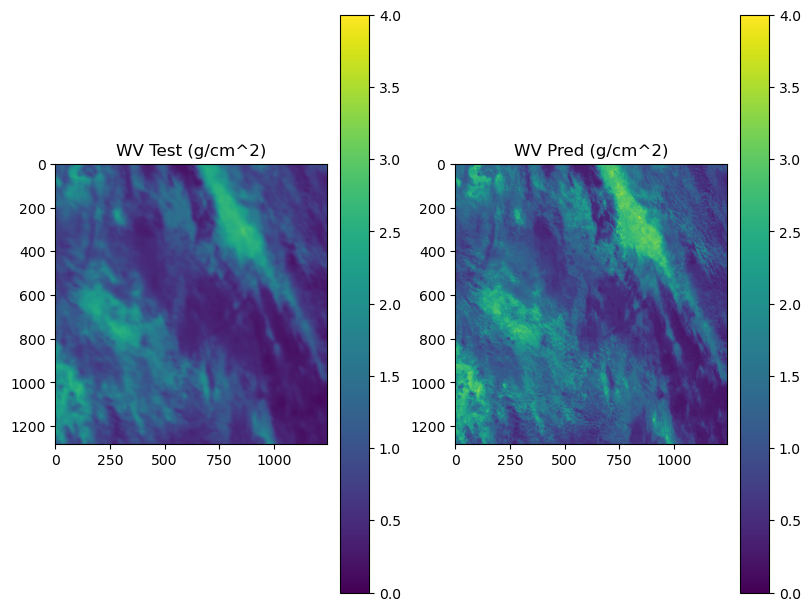

In [7]:
analysis.disp_h2o_data.plot_h2o_compare(wv[0], pred_data)

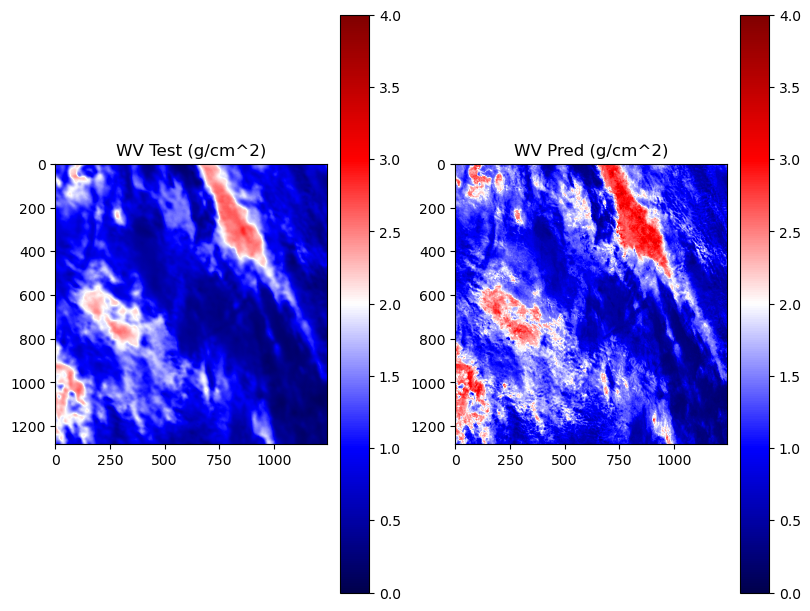

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6), constrained_layout = True)

im1 = axs[0].imshow(wv[0], cmap = 'seismic')
fig.colorbar(im1)
im1.set_clim(0, 4.0)
axs[0].set_title("WV Test (g/cm^2)")

im2 = axs[1].imshow(pred_data, cmap = 'seismic')
fig.colorbar(im2)
axs[1].set_title("WV Pred (g/cm^2)")
im2.set_clim(0, 4.0)

Text(0.5, 1.0, 'Residuals between Predicted and Actual WV Mask')

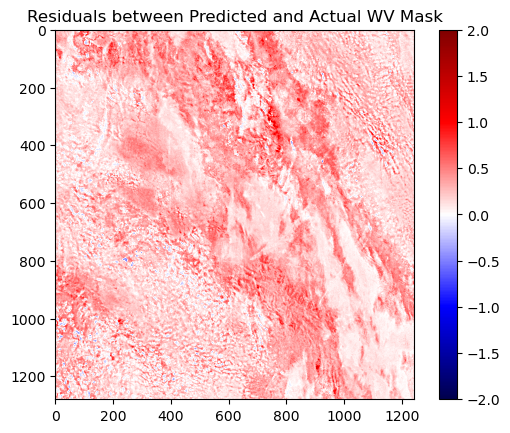

In [16]:
residuals = np.subtract(pred_data, wv[0])
plt.imshow(residuals, cmap = 'seismic')
plt.colorbar()
plt.clim(-2, 2)
plt.title('Residuals between Predicted and Actual WV Mask')